# Beta Bank Project

### Introducción.

En este proyecto vamos a trabajar con los datos de los clientes del banco Beta Bank.
Cada mes los clientes del banco se están yendo poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Por lo anterior, necesitamos predecir si un cliente dejará el banco pronto. Para ello disponemos de los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

### Inicialización y carga de datos. 

Primero procedemos a importar Librerías:

In [3]:
# Cargamos todas las librerías que ocuparemos en el proyecto:
import pandas as pd # importamos las librerías de pandas
from matplotlib import pyplot as plt # importamos las librerías pyplot de Matplotlib
import numpy as np # importamos la librerías de NumPy, se usa para funciones matemáticas complejas
from scipy import stats as st # importamos el módulo stats de la librería SciPy.
import seaborn as sns # importamos la librería Seaborn para realizar unos gráficos
sns.set_theme() # ocupamos esa librería para tener meejores gráficos
from sklearn.model_selection import train_test_split #importamos la función train_test_split biblioteca scikit-learn
from sklearn.tree import DecisionTreeClassifier # importamos la clase DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # importamos la clase RandomForestClassifier 
from sklearn.metrics import accuracy_score # importamos la función accuracy_score de la biblioteca scikit-learn
from sklearn.metrics import f1_score # importamos la función f1_score de la biblioteca scikit-learn
from sklearn.metrics import roc_auc_score # importamos la función roc_auc_score de la biblioteca scikit-learn
from sklearn.utils import shuffle # importamos la función shuffle de la biblioteca scikit-learn

Leemos el Conjunto de Datos con la información del banco Beta Bank:

In [4]:
# Cargamos el DataFrame:
dbank = pd.read_csv('/datasets/Churn.csv') #cargamos el DataFrame.

### Preprocesamiento de los datos. 

Mostramos información general sobre el Conjunto de Datos:

In [5]:
# Imprimimos la información general/resumida sobre el DataFrame
dbank.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(dbank.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
----------
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0        

En base al método info podemos ver que el conjunto de datos se encuentra conformado por 13 columnas de variables. Todas corresponden a variables numéricas salvo las columnas Surname, Gender y Geography que son columnas tipo string. Para estas columnas deberemos considerar algún tipo de procesamiento adicional si queremos incorporarlas en el análisis de modelos. 

Por otro lado, al parecer tenemos presencia de valores ausentes en la columna Tenure, lo cual analizaremos más adelante.

In [6]:
# Utilizamos el método describe() para realizar una exploración rápida inicial de las variables numéricas
# del conjunto de datos.
dbank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Ocupando el método describe() podemos tener toda la información de las distintas columnas del conjunto de datos. En particular vemos los valores de promedio, desviación estándar y valores máximos y mínimos para cada variable. Estos estadísticos nos pueden ayudar a comprender la distribución y la variabilidad de los datos, así como a identificar posibles valores atípicos o anomalías.

En particular, podemos ver que para la columna Exited, que es la columna objetivo (target), es una columna binaria donde 1 corresponde a un cliente que se ha ido (1 - sí; 0 - no) y 0 representa que el cliente no se ha ido (1 - sí; 0 - no). La media de esta columna indica la proporción de clientes que se fueron.

Entonces, para el conjunto de datos del banco Beta Bank, aproximadamente el 20,37% de los clientes se han ido del banco, mientras que el restante 79,63% se encuentra aún en el banco.

A continuación vamos a analizar si hay columnas totalmente duplicadas y valores ausentes en el conjunto de datos.

In [7]:
# Verificamos que no hay filas totalmente duplicadas en el Dataframe del banco Beta Bank.
print('El número de filas totalmente duplicadas en el DF dbank es:')
print(dbank.duplicated().sum())# verificamos si hay filas duplicadas.

print('------------------')

#Verificamos que no hay valores ausentes en el Dataframe.
dbank.isna().sum() # para conocer los valores ausentes ocupamos usamos el método isna() 
                          # junto con el método sum().


El número de filas totalmente duplicadas en el DF dbank es:
0
------------------


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Vemos que no existen filas totalmente duplicadas, pero si hay 909 elementos ausentes en la columna Tenure.

Sin embargo, antes de continuar con el análisis y de realizar los cambios en el conjunto de datos, considerando las reglas del buen estilo, vamos a traspasar a minúsculas todos los caracteres de los encabezados de las columnas.

In [8]:
dbank.columns# Muestra los nombres de las columnas

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# Bucle en los encabezados poniendo todo en minúsculas

new_col_names = []
for old_name in dbank.columns:
    name_lowered = old_name.lower() # con el método lowered pasamos todas las columnas a minúsculas
    new_col_names.append(name_lowered)
dbank.columns = new_col_names

print(dbank.columns) # comprobamos el resultado realizando un print con el método columns.

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


Ahora procederemos a analizar los valores ausentes de la columna tenure, que corresponde al período de años durante el cual ha tenido un depósito a plazo fijo un cliente.

Para ello primero vamos a imprimir algunas filas de los valores ausentes para tener una idea general de ellos.

In [10]:
# Filtramos las filas con valores ausentes en la columna 'tenure'
rows_with_missing_tenure = dbank[dbank['tenure'].isna()]

# Imprimimos las primeras 10 filas con valores ausentes en la columna 'tenure'
print(rows_with_missing_tenure.head(10))

     rownumber  customerid    surname  creditscore geography  gender  age  \
30          31    15589475    Azikiwe          591     Spain  Female   39   
48          49    15766205        Yin          550   Germany    Male   38   
51          52    15768193  Trevisani          585   Germany    Male   36   
53          54    15702298   Parkhill          655   Germany    Male   41   
60          61    15651280     Hunter          742   Germany    Male   35   
82          83    15641732      Mills          543    France  Female   36   
85          86    15805254    Ndukaku          652     Spain  Female   75   
94          95    15676966      Capon          730     Spain    Male   42   
99         100    15633059    Fanucci          413    France    Male   34   
111        112    15665790   Rowntree          538   Germany    Male   39   

     tenure    balance  numofproducts  hascrcard  isactivemember  \
30      NaN       0.00              3          1               0   
48      NaN  103

In [11]:
# La columna Tenure corresponde al período de años durante el cual ha madurado el depósito a plazo fijo 
# de un cliente. 
# Vamos a suponer que los clientes que no tiene un depósito a plazo fijo tienen NaN en esa 
# columna. Como representan a aproximadamente un 9% de los clientes, en vez de eliminar estas filas,
# vamos a definir un período de cero años a los clientes que tienen NaN.

# Para ello le completaremos los valores ausentes con un valor cero ocupando un Bucle for:

columns_to_replace = []
for col in dbank.columns:
    dbank[col].fillna(0, inplace=True) # mediante este bucle reemplazamos los valores ausentes con cero.
    
print(dbank.isna().sum()) # luego comprobamos que ya no hay valores ausentes.

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64


Ahora, con el objeto de conocer un poco más el conjunto de datos antes de entrar a los modelos, realizaremos un conjunto de gráficos sobre como se comportan los promedios de algunas variables en función de la columna objetivo Exited, que nos indica si el cliente se ha ido (1 - sí; 0 - no).

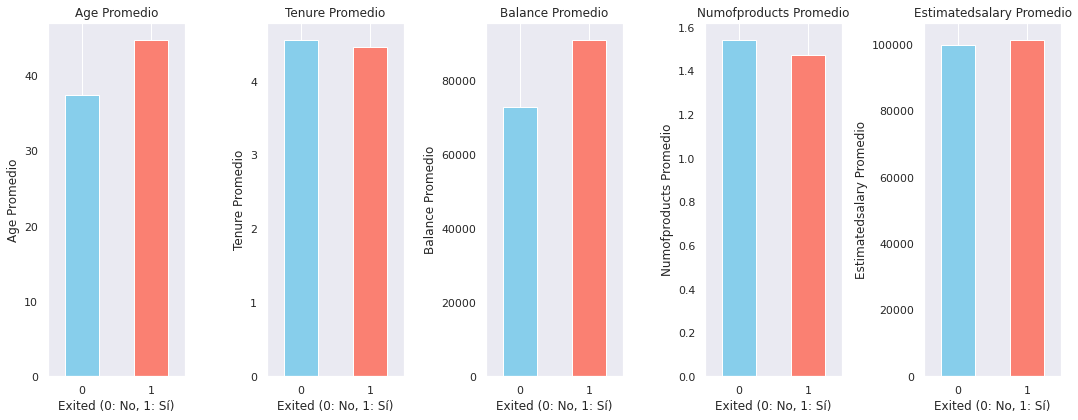

In [12]:
# Calculamos la media de cada característica para cada categoría del Objetivo (target) exited , 
# Exited = El cliente se ha ido (1 - sí; 0 - no)

features = ['age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(15, 6))

for i, feature in enumerate(features, start=1):
    plt.subplot(1, 5, i)
    feature_mean_by_exited = dbank.groupby('exited')[feature].mean()
    feature_mean_by_exited.plot(kind='bar', color=colors)
    plt.title(f'{feature.capitalize()} Promedio')
    plt.xlabel('Exited (0: No, 1: Sí)')
    plt.ylabel(f'{feature.capitalize()} Promedio')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


A partir de los gráficos podemos ver que los clientes que se han ido del banco, son clientes que en promedio tienen un mayor edad, clientes que tenían un mayor Balance, saldo de la cuenta, y un levemente mayor promedio de EstimatedSalary (salario estimado). Es decir corresponden a clientes muy interesantes o buenos clientes para el banco. 

También podemos ver que en promedio, los clientes que dejaron el banco, corresponden a clientes que tenían levemente menos años en depósito a plazo fijo y en promedio menos cantidad de productos.



### Segmentación de los datos. 

Para poder continuar con el análisis solicitado, primero debemos transformar alguna características categóricas en características numéricas. Nos referimos a las columnas de gender y geography, estas dos columnas se encuentran como object (string) y las pasaremos a variables numéricas. 

Para el caso de la columna geography primero vamos a confirmar cuantos géneros únicos tiene, que en este caso corresponden a países.

In [13]:
# Vamos a confirmar cuantos países (géneros únicos) posee la columna geography:
dbank_sort = dbank.sort_values(by='geography') # primero ordenar la columna por orden alfabético
dbank_unique = dbank_sort['geography'].unique() # segundo generamos una lista de generos únicos
print(dbank_unique) # imprimir la lista de géneros únicos

['France' 'Germany' 'Spain']


In [14]:
# Ocupamos el método astype para generar las columnas numéricas a partir de las columnas categóricas 
# gender y geography
dbank ["gender_binary"] = (dbank["gender"] == "Female").astype("int")
dbank["france_binary"] = (dbank["geography"] == "France").astype("int")
dbank[ "germany_binary"] = (dbank ["geography"] == "Germany").astype("int")

A continuación verificamos con el método info la creación y tipo de las nuevas columnas generadas: gender_binary (1= Female, o= Male), france_binary (1=France, o= No france) y germany_binary (1= Germany, 0= No Germany).

In [15]:
dbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
 14  gender_binary    10000 non-null  int64  
 15  france_binary    10000 non-null  int64  
 16  germany_binary   10000 non-null  int64  
dtypes: float64(3)

A continuación imprimimos las 10 primeras líneas del conjunto de datos, y confirmamos la generación de las nuevas columnas gender_binary, france_binary y germany_binary.

In [16]:
dbank.head(10)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,gender_binary,france_binary,germany_binary
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,1,1,0
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,1,0,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,1,1,0
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,1,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,1,0,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1,0,0,0
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0,0,1,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1,1,0,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0,0,1,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0,0,1,0


Vamos a proceder a segmentar los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.

In [17]:
# Identificamos las columnas que no vamos a utilizar:
drop_columns = ["rownumber", "customerid", "surname", "geography", "gender"]

# Extraemos la variable objetivo (target) del conjunto de datos y la almacenamos en target.
target = "exited"

# Extraemos las características (features) del conjunto de datos y las almacenamos en features.
features = [c for c in dbank.columns if c not in drop_columns + [target]]

In [18]:
# Comprobamos que están correctas las caraterísticas (features), que son todos menos las variable aobjetivo.
features

['creditscore',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'gender_binary',
 'france_binary',
 'germany_binary']

Vamos a realizar la segmentación de los datos en conjuntos de entrenamiento, validación y prueba utilizando la función train_test_split() de scikit-learn.

El conjunto de datos de Beta Bank se va a dividir en:

Conjunto de Prueba (test_df): Se obtendrá del 18% del conjunto de datos original utilizando la primera llamada a train_test_split(). Este conjunto se utilizará para evaluar el rendimiento final del modelo.

Conjunto de Entrenamiento Completo (full_train_df): Se obtendrá del 82% restante del conjunto de datos original que no se utilizó para el conjunto de prueba.

Conjunto de Entrenamiento (train_df) y Conjunto de Validación (valid_df): Se obtienen dividiendo el conjunto de entrenamiento completo en una proporción del 77% y 23%, respectivamente, utilizando la segunda llamada a train_test_split().

In [19]:
# El dataset dbank se divide en el conjunto de prueba (test_df) y el conjunto de entrenamiento completo
# (full_train_df):
full_train_df, test_df = train_test_split(
    dbank,
    test_size=0.18, 
    random_state=12345)

# El conjunto de entrenamiento completo (full_train_df) se divide en el conjunto de entrenamiento (train_df) y 
# conjunto de validación (valid_df):
train_df, valid_df = train_test_split(
    full_train_df, 
    test_size=0.23, 
    random_state=12345)

In [20]:
# Imprimimos las formas (shapes) de los conjuntos de datos resultantes, para verificar sus tamaños.
print("Forma del Dataframe:", dbank.shape)
print("Forma del conjunto de entrenamiento:", train_df.shape)
print("Forma del conjunto de validación:", valid_df.shape)
print("Forma del conjunto de prueba:", test_df.shape)

Forma del Dataframe: (10000, 17)
Forma del conjunto de entrenamiento: (6314, 17)
Forma del conjunto de validación: (1886, 17)
Forma del conjunto de prueba: (1800, 17)


Mediante este método shape() confirmamos el tamaño del conjunto de entrenamiento de 63%, 
el conjunto de validación 19% y el conjunto de prueba de un 18%.

In [21]:
[len (df)/ len (dbank) for df in [dbank, full_train_df, train_df, valid_df, test_df]]

[1.0, 0.82, 0.6314, 0.1886, 0.18]

Mediante este cálculo confirmamos los porcentajes de cada conjunto, vemos que el conjunto de entrenamiento tiene un 63% del total, en cambio los conjuntods de validación y prueba tienen un 19% y 18% erspectivamente.

### Equilibrio de Clases. 

Para analizar el equilibrio de clases, vamos a ocupar un Modelo de Bosque Aleatorio (RandomForestClassifier) con 100 árboles en el bosque (n_estimators=100)  y un estado aleatorio fijo para reproducibilidad (random_state=12345).

In [22]:
# Creamos el Modelo de Bosque Aleatorio (RandomForestClassifier) con 100 árboles en el bosque (n_estimators=100) 
# y un estado aleatorio fijo para reproducibilidad (random_state=12345).
model = RandomForestClassifier(n_estimators=100, random_state=12345)

# Luego entrenamos el Modelo utilizando las características (features) del conjunto de entrenamiento (train_df)
# y la variable objetivo (target).
model.fit(train_df[features], train_df[target])

# Utilizamos el modelo entrenado para hacer predicciones sobre las características del conjunto de validación
# (valid_df[features]).
y_preds = model.predict(valid_df[features])

# Finalmente calculamos la exactitud del modelo comparando las etiquetas predichas (y_preds) 
# con las etiquetas reales del conjunto de validación (valid_df[target]).
accuracy_score(valid_df[target], y_preds)

0.876458112407211

In [23]:
#Calculamos la proporción de muestras con el valor de la clase  0 (Exited: El cliente se ha ido (1 - sí; 0 - no)) 
# en el conjunto de prueba.
(test_df[target] == 0).mean()

0.7888888888888889

In [24]:
#Calculamos la proporción de muestras con el valor de la clase 1 (Exited: El cliente se ha ido (1 - sí; 0 - no)) 
# en el conjunto de prueba.
(test_df[target] == 1). mean ()

0.2111111111111111

Con el objeto de mostrar de manera más visual el desequilibrio entre las clases, realizamos un gráfico de la frecuncia de clases.

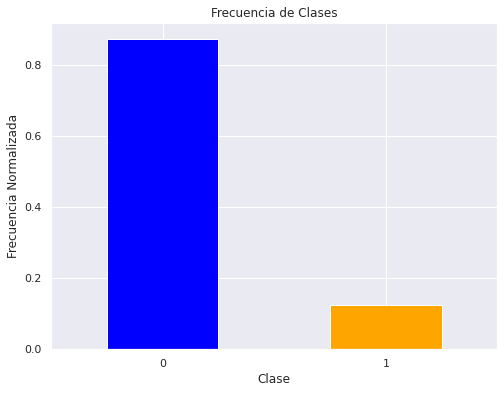

In [25]:
# Predecimos las clases en el conjunto de validación. 
# Para hacer que value_counts() funcione, convertimos los resultados a pd.Series
predicted_valid = pd.Series(model.predict(valid_df[features]))

# Calculamos la frecuencia de cada clase
class_frequency = predicted_valid.value_counts(normalize=True)

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
class_frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frecuencia de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia Normalizada')
plt.xticks(rotation=0)
plt.show()

Por definición las clases están desequilibradas cuando su proporción está lejos de 1:1. 
Eso quiere decir que el equilibrio de clases se observa si su número es aproximadamente igual
Vemos que para nuestro conjunto de datos, las clases se encuentran desequilibradas, debido a que la clase 0 se encuentra en un 79% aprox. y la clase 1 está en un 21%.

Obtuvimos una exactitud del modelo de aproximadamente 0.8764 al usar el modelo de Bosque Aleatorio en el conjunto de validación. Esto significa que el modelo de Bosque Aleatorio logró clasificar correctamente alrededor del 87.64% de las muestras en el conjunto de validación.

Sin embargo lamentablemente la exactitud no evalúa bien el modelo en un escenario de fuerte desequilibrio como el que hemos detectado.

La exactitud del modelo fue del 87.6%, lo que indica un buen rendimiento general. Sin embargo, al observar las proporciones de las clases, vemos que la clase 0 (clientes que no abandonaron el banco) es dominante en comparación con la clase 1 (clientes que abandonaron el banco). Esta desigualdad en la distribución de clases puede afectar la capacidad del modelo para detectar correctamente la clase minoritaria.

### Ajuste de Peso de Clase. 

Para abordar el desequilibrio de clases encontrado en un conjunto de datos vamos a utilizar diferentes valores de Peso de Clase (class_weights). Al ajustar los pesos de clase, podemos indicar al modelo que preste más atención a las muestras de la clase minoritaria durante el entrenamiento. Esto puede conducir a una mejora en la capacidad del modelo para detectar correctamente las instancias de la clase minoritaria.

Entonces, procederemos a probar diferentes valores de class_weights y evaluaremos cómo afectan el desempeño del modelo en términos de F1-score.

In [54]:
# Definirmos los valores de Peso de Clase (class_weights) que vamos probar:
class_weight_values = [4, 4.5, 5, 5.5, 6]

# Inicializamos una lista para almacenar los resultados del F1-score para cada valor de class_weights:
f1_scores = []

# Iteramos sobre los valores de class_weights
for class_weight_value in class_weight_values:
    
    # Creamos un modelo RandomForestClassifier con el valor de class_weights actual
    model = RandomForestClassifier(n_estimators=100, random_state=12345, class_weight={0: 1, 1: class_weight_value})
    
    # Entrenamos el modelo con el conjunto de entrenamiento
    model.fit(train_df[features], train_df[target])
    
    # Realizamos predicciones en el conjunto de validación
    y_pred = model.predict(valid_df[features])
    
    # Calculamos el F1-score y agregarlo a la lista de resultados
    f1 = f1_score(valid_df[target], y_pred)
    f1_scores.append(f1)

# Encontramos el mejor valor de class_weights (el que maximiza el F1-score)
best_class_weight_value = class_weight_values[f1_scores.index(max(f1_scores))]
best_f1_score = max(f1_scores)

print("Mejor valor de class_weights:", best_class_weight_value)
print("Mejor F1-score obtenido:", best_f1_score)

Mejor valor de class_weights: 4.5
Mejor F1-score obtenido: 0.5972222222222221


El mejor valor de class_weights encontrado fue 4.5, y el F1-score correspondiente obtenido fue de aproximadamente 0.597. Ahora, vamos a aplicar este valor de class_weights al modelo final y evaluar su rendimiento en el conjunto de prueba para confirmar si también mejora el desempeño en datos no vistos.

In [55]:
# Creamos el modelo de RandomForestClassifier con el mejor valor de class_weights encontrado
model = RandomForestClassifier(n_estimators=100, random_state=12345, class_weight={0: 1, 1: 4.5})

# Entrenamos el modelo utilizando el conjunto de entrenamiento completo
model.fit(full_train_df[features], full_train_df[target])

# Realizamos predicciones en el conjunto de prueba
predictions_test = model.predict(test_df[features])

# Calculamos el F1-score en el conjunto de prueba
f1 = f1_score(test_df[target], predictions_test)

# Calculamos el ROC AUC Score en el conjunto de prueba
roc_auc = roc_auc_score(test_df[target], predictions_test)

print("F1 Score en el conjunto de prueba:", f1)
print("ROC AUC Score en el conjunto de prueba:", roc_auc)

F1 Score en el conjunto de prueba: 0.5564924114671164
ROC AUC Score en el conjunto de prueba: 0.7002038547071905


El F1-score disminuiyó ligeramente en comparación con el valor obtenido en el conjunto de validación, el modelo sigue teniendo un desempeño razonable con un ROC AUC Score de 0.7005 en el conjunto de prueba.

Vamos a continuar con la siguiente técnica para abordar el desequlibrio de clases, con el objeto de buscar mejores resultados.

### Ajuste de Umbral. 

Implementamos la técnica de ajuste de umbral para abordar el desequlibrio de clases y mejorar la calidad del modelo. 
Para cada umbral, calculamos el F1-score utilizando las predicciones de probabilidad y el umbral actual. 
El F1-score se calcula comparando las predicciones binarias resultantes (utilizando el umbral) con las etiquetas verdaderas del conjunto de validación.

In [51]:
# Creamos el Modelo de Bosque Aleatorio (RandomForestClassifier) con 100 árboles en el bosque (n_estimators=100) 
# y un estado aleatorio fijo para reproducibilidad (random_state=12345).
model = RandomForestClassifier(n_estimators=100, random_state=12345)

# Luego entrenamos el Modelo utilizando las características (features) del conjunto de entrenamiento (train_df)
# y la variable objetivo (target).
model.fit(train_df[features], train_df[target])

# Predicción de probabilidades: Se realizan predicciones de probabilidad sobre las características 
# del conjunto de validación (valid_df[features]). La probabilidad de pertenencia a la clase positiva 
# se extrae utilizando predict_proba y seleccionando la columna correspondiente a la clase positiva ([:,1]). 
predictions = model.predict_proba(valid_df[features])[:, 1]

#Iteración sobre diferentes umbrales: Se itera sobre una serie de umbrales específicos, 
# que van desde 0.25 hasta 0.4 en pasos de 0.01.
thresholds = np.linspace(0.25, 0.4, 21)

# Se imprime el umbral actual y el F1-score correspondiente.
for t in thresholds:
    print(f"Threshold: {round(t, 2)}, F1 score: {round(f1_score(valid_df[target], predictions > t), 4)}")

Threshold: 0.25, F1 score: 0.5769
Threshold: 0.26, F1 score: 0.5769
Threshold: 0.26, F1 score: 0.5876
Threshold: 0.27, F1 score: 0.5839
Threshold: 0.28, F1 score: 0.5897
Threshold: 0.29, F1 score: 0.5897
Threshold: 0.3, F1 score: 0.6007
Threshold: 0.3, F1 score: 0.6073
Threshold: 0.31, F1 score: 0.6107
Threshold: 0.32, F1 score: 0.6107
Threshold: 0.32, F1 score: 0.6136
Threshold: 0.33, F1 score: 0.6117
Threshold: 0.34, F1 score: 0.6233
Threshold: 0.35, F1 score: 0.6233
Threshold: 0.36, F1 score: 0.6262
Threshold: 0.36, F1 score: 0.6248
Threshold: 0.37, F1 score: 0.6243
Threshold: 0.38, F1 score: 0.6243
Threshold: 0.38, F1 score: 0.6236
Threshold: 0.39, F1 score: 0.6305
Threshold: 0.4, F1 score: 0.6281


El resultado que obtuvimos muestra cómo varía el F1-score a medida que cambia el umbral de decisión.

El objetivo es encontrar el umbral que maximiza el F1-score, lo que indica el mejor equilibrio entre precisión y exhaustividad del modelo. En nuestro caso, parece que el F1-score alcanza su punto máximo alrededor de un umbral de 0.36. Por lo que ese será el valor que utilizaremos en el modelo final.


Hacemos predicciones en el conjunto de prueba utilizando el método predict_proba del modelo entrenado. Este método devuelve las probabilidades de pertenencia a cada clase, y estamos interesados en la probabilidad de la clase positiva, por lo que seleccionamos la segunda columna de la matriz de probabilidades utilizando [:, 1].

Luego, aplicamos el umbral óptimo de 0.36 para convertir las probabilidades en predicciones binarias. Esto se hace comparando las probabilidades con el umbral y convirtiendo cualquier probabilidad superior a 0.36 en 1 (clase positiva) y cualquier probabilidad menor o igual a 0.36 en 0 (clase negativa).

Finalemente calculamos el valor de F1-score y el valor de AUC-ROC utilizando las predicciones binarias y las etiquetas reales del conjunto de prueba.

In [52]:
# Hacer predicciones en el conjunto de prueba
predictions_test = model.predict_proba(test_df[features])[:, 1]

# Aplicar el umbral óptimo para convertir probabilidades en predicciones binarias
predictions_binary = (predictions_test > 0.36).astype(int)

# Calculamos el valor de f1_score
f1_score(test_df[target], predictions_binary)

0.6168741355463349

In [53]:
# Calculamos el valor de roc_auc_score
roc_auc_score(test_df[target], predictions_binary)

0.7511675315048184

Los resultados obtenidos son los siguientes:

F1-score = 0.6168
AUC-ROC = 0.7511


Estos resultados son consistentes con lo que observamos anteriormente en el conjunto de validación. El F1-score alcanzó su valor máximo alrededor de 0.36, aunque un poco menor que en el conjunto de validación, lo cual es esperable ya que el modelo se está evaluando en un conjunto de datos diferente. Este resultado para F1-score es superior al valor obtenido con el método de Ajuste de Peso de Clases.

Para el AUC-ROC también se obtuvo un valor alto y superior al valor obtenido con el método de Ajuste de Peso de Clases.

En general, estos resultados sugieren que el modelo es capaz de generalizar bien y tiene un buen rendimiento en el conjunto de prueba, lo que indica que la estrategia de ajuste de umbral fue efectiva para mejorar el rendimiento del modelo.

### Método del Sobremuestreo. 

A continuación vamos a ocupar la técnica del Sobre Muestreo para abordar el desequilibrio de clases. Esta técnica busca equilibrar la distribución de clases aumentando el número de muestras de la clase minoritaria mediante la replicación de las muestras existentes.

Vamos a replicar las muestras de la clase minoritaria ("repeat") calculando el valor de F1_score para los valores de repeat igual a 1, 5, 10, 15, 20, 25 y 30.  

In [31]:

# Primero definimos la función para el sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Sobre muestreo de la clase minoritaria
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    #Mezclamos de manera aleatoria los datos:
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

# Definimos los valores de repeat para iterar
repeat_values = [1, 5, 10, 15, 20, 25, 30]

best_f1_score = 0
best_repeat_value = None

# Iteramos sobre los valores de repeat
for repeat in repeat_values:
    features_upsampled, target_upsampled = upsample(
        train_df[features], train_df[target], repeat
    )

    # Entrenamos el modelo de Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    
    # Realizamos predicciones en el conjunto de validación
    predicted_valid = model.predict(valid_df[features])

    # Calculamos el F1 Score
    f1 = f1_score(valid_df[target], predicted_valid)
    print(f"F1 Score (Repeat={repeat}): {f1}")

    # Actualizamos el mejor F1 Score y el valor de repeat
    if f1 > best_f1_score:
        best_f1_score = f1
        best_repeat_value = repeat

# Mostramos el mejor F1 Score y el valor de repeat asociado
print(f"Best F1 Score: {best_f1_score} (Repeat={best_repeat_value})")

F1 Score (Repeat=1): 0.5963149078726968
F1 Score (Repeat=5): 0.6199701937406854
F1 Score (Repeat=10): 0.6186186186186187
F1 Score (Repeat=15): 0.6167664670658684
F1 Score (Repeat=20): 0.6234939759036144
F1 Score (Repeat=25): 0.6170212765957447
F1 Score (Repeat=30): 0.6038863976083707
Best F1 Score: 0.6234939759036144 (Repeat=20)


El mejor valor que obtuvimos para el F1_score fue para repeat = 20, por lo que ahora calculamos el valor de F1-score y el valor de AUC-ROC utilizando ese valor de repeat en el conjunto de prueba.

In [34]:
# Aplicar sobremuestreo en el conjunto de entrenamiento completo
features_upsampled, target_upsampled = upsample(
    full_train_df[features], full_train_df[target], repeat=20
)

# Entrenar el modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=12345)
model.fit(features_upsampled, target_upsampled)

# Hacer predicciones en el conjunto de prueba
predictions_test = model.predict(test_df[features])

# Calcular el F1 Score en el conjunto de prueba
f1_score_test = f1_score(test_df[target], predictions_test)
print("F1 Score en el conjunto de prueba:", f1_score_test)
print("AUC_ROC en el conjunto de prueba:",roc_auc_score(test_df[target], predictions_test))

F1 Score en el conjunto de prueba: 0.5807407407407408
AUC_ROC en el conjunto de prueba: 0.7230355819125278


### Conclusión General. 

En este proyecto trabajamos con los datos de los clientes del banco Beta Bank. 
Luego de cargar y preprocesar los datos para el análisis, en este proyecto exploramos dos técnicas
para abordar el desequilibrio de clases en problemas de clasificación. Para ello ocupamos los métodos de 
ajuste de Pesos de Clases y de ajuste de Umbral. 

Con el método de ajuste de Pesos de Clases, el utilizar diferentes pesos para las clases desequilibradas 
puede ayudar al modelo a dar más importancia a las muestras de la clase minoritaria durante el entrenamiento. 
En nuestro caso, encontramos que ajustar los pesos de las clases a 4.5 produjo el mejor F1-score en el conjunto 
de validación.

Con el método de Ajuste de Umbral, al modificar el umbral de probabilidad para asignar etiquetas de clase, podemos 
ajustar la sensibilidad y la especificidad del modelo para adaptarse a las necesidades específicas del problema.
En nuestro caso,  el F1-score alcanzó su punto máximo alrededor de un umbral de 0.36. 
Por lo que ese fue el valor que utilizamos en el modelo final.

Obtuvimos mejores resultados con el método de Ajuste de Umbral, en el conjunto de prueba el F1-score 
obtuvo a un valor de 0,6168, valor superior al valor límite de 0,59 solicitado para el proyecto.

También para ambos métodos fueron calculados los valores de AUC-ROC; obteniendo valores de 0,70 para el método 
de ajuste de Pesos de Clases y de 0,7511 para el método de ajuste de Umbral. Ambos representan valores 
razonables en el conjunto de prueba, lo que sugiere que el modelo generaliza bien a datos no vistos.

